In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

In [3]:
# --- 1. Load the CSV file ---
df = pd.read_excel(r"C:\Users\mkcoo\Documents\UW\GitHub\PNSB\PettRidge\Figure Code\Figure 4\LLM_target_identification_251103.xlsx", sheet_name='Sheet2')  # use sep="," if it's comma-delimited

In [4]:
# --- 2. Group targets by LLM service ---
chatgpt5 = set(df[df["LLM Service"] == "ChatGPT 5"]["Target"])
claude = set(df[df["LLM Service"] == "Claude"]["Target"])
flux = set(df[df["LLM Service"] == "Flux RETAP"]["Target"])

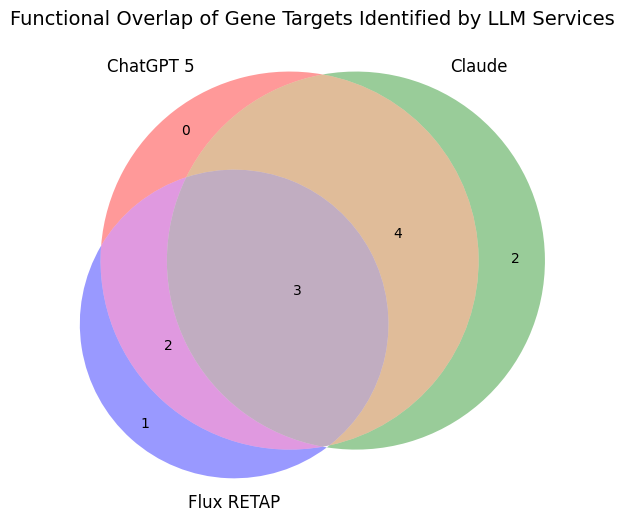

In [6]:
# --- Create Venn diagram ---
plt.figure(figsize=(7, 7))
venn = venn3(
    [chatgpt5, claude, flux],
    set_labels=("ChatGPT 5", "Claude", "Flux RETAP"),
)
plt.title("Functional Overlap of Gene Targets Identified by LLM Services", fontsize=14)

# --- Save as SVG ---
plt.savefig("Fig4B.svg", format="svg", bbox_inches="tight")

# --- Show the figure (optional) ---
plt.show()

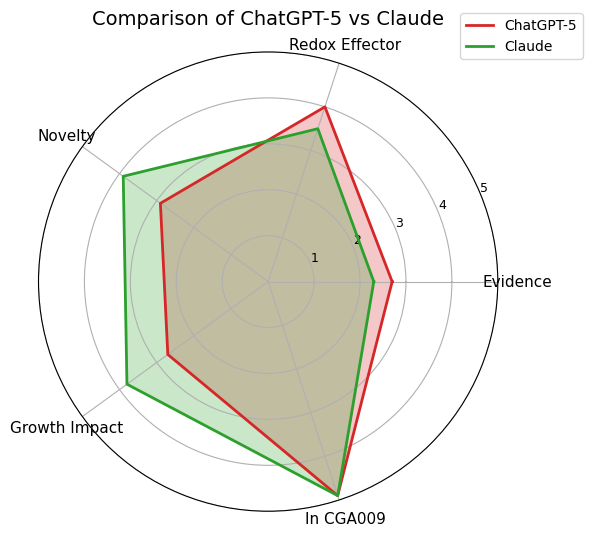

In [4]:
# --- Data ---
categories = ['Evidence', 'Redox Effector', 'Novelty', 'Growth Impact', 'In CGA009']
chatgpt5_scores = [2.7, 4, 2.9, 2.7, 4.9]
claude_scores = [2.3, 3.5, 3.9, 3.8, 4.9]

# Close the loop for radar shape
categories += [categories[0]]
chatgpt5_scores += [chatgpt5_scores[0]]
claude_scores += [claude_scores[0]]

# --- Angles for each axis ---
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=True)

# --- Create plot ---
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot each dataset
ax.plot(angles, chatgpt5_scores, label='ChatGPT-5', color='tab:red', linewidth=2)
ax.fill(angles, chatgpt5_scores, color='tab:red', alpha=0.25)

ax.plot(angles, claude_scores, label='Claude', color='tab:green', linewidth=2)
ax.fill(angles, claude_scores, color='tab:green', alpha=0.25)

# --- Customize axes ---
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories[:-1], fontsize=11)
ax.set_yticks(range(1, 6))
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=9)
ax.set_ylim(0, 5)

# --- Add legend ---
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

plt.title("Comparison of ChatGPT-5 vs Claude", size=14, pad=20)
plt.tight_layout()
plt.savefig("Fig4C.svg", format="svg", bbox_inches="tight")
plt.show()
